In [91]:
# Add the pandas dependency:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
# Files to load: 

security_data_to_load = "../Resources/security_data_set.csv"

In [93]:
# Read the school data file and store it in a Pandas DataFrame:

security_df = pd.read_csv(security_data_to_load)

security_df.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2.014090e+12,18-Aug-14,14-Jul-14,EWR,Newark International Airport,UAL,Property Damage,Checked Baggage,Sporting Equipment & Supplies,"$2,500.00",Settle
1,2.014080e+12,22-Jul-14,9-Jul-14,ORD,Chicago O'Hare International Airport,Spirit Airlines,Property Damage,Checkpoint,Computer & Accessories,"$2,430.74",Settle
2,2.014120e+12,26-Nov-14,2-Aug-14,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Medical/Science,"$2,400.00",Settle
3,2.014050e+12,14-May-14,20-Mar-14,MCO,Orlando International Airport,Jet Blue,Passenger Property Loss,Checked Baggage,Other,"$2,250.00",Settle
4,2.014030e+12,17-Mar-14,25-Feb-14,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,Currency,"$2,200.00",Approve in Full


In [94]:
security_df.sample(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
216,2.014020e+12,31-Jan-14,30-Dec-13,OKC,Will Rogers World,UAL,Property Damage,Checked Baggage,Baggage/Cases/Purses,$450.00,Settle
772,2.014050e+12,15-May-14,13-Apr-14,BDL,Bradley International Airport,Southwest Airlines,Property Damage,Checked Baggage,Home Decor,$150.00,Approve in Full
410,2.014060e+12,5-Jun-14,25-May-14,ORD,Chicago O'Hare International Airport,American Airlines,Property Damage,Checked Baggage,Household Items,$293.12,Approve in Full
1034,2.014020e+12,10-Feb-14,21-Jan-14,EWR,Newark International Airport,UAL,Passenger Property Loss,Checked Baggage,Computer & Accessories,$100.00,Approve in Full
1750,2.014090e+12,21-Aug-14,4-Aug-14,SEA,Seattle-Tacoma International,Alaska Airlines,Passenger Property Loss,Checked Baggage,Other,$29.00,Approve in Full


In [95]:
# Check data types:

security_df.dtypes

Claim Number     float64
Date Received     object
Incident Date     object
Airport Code      object
Airport Name      object
Airline Name      object
Claim Type        object
Claim Site        object
Item Category     object
Close Amount      object
Disposition       object
dtype: object

In [96]:
# Verify rows per column:

security_df.count()

Claim Number     4593
Date Received    4593
Incident Date    4593
Airport Code     4593
Airport Name     4593
Airline Name     4593
Claim Type       4593
Claim Site       4593
Item Category    4593
Close Amount     4593
Disposition      4593
dtype: int64

In [97]:
# Find how many claims associated with each airport:

airport_security_delay = security_df.groupby(["Airport Code"]).count()["Claim Number"]
airport_security_delay

Airport Code
ABE     3
ABI     3
ABQ    21
ACK     2
ACY     6
       ..
UNV     2
VIS     1
XNA     3
YNG     5
YUM     4
Name: Claim Number, Length: 243, dtype: int64

Text(0.5, 1.0, 'Security Delays by Airport')

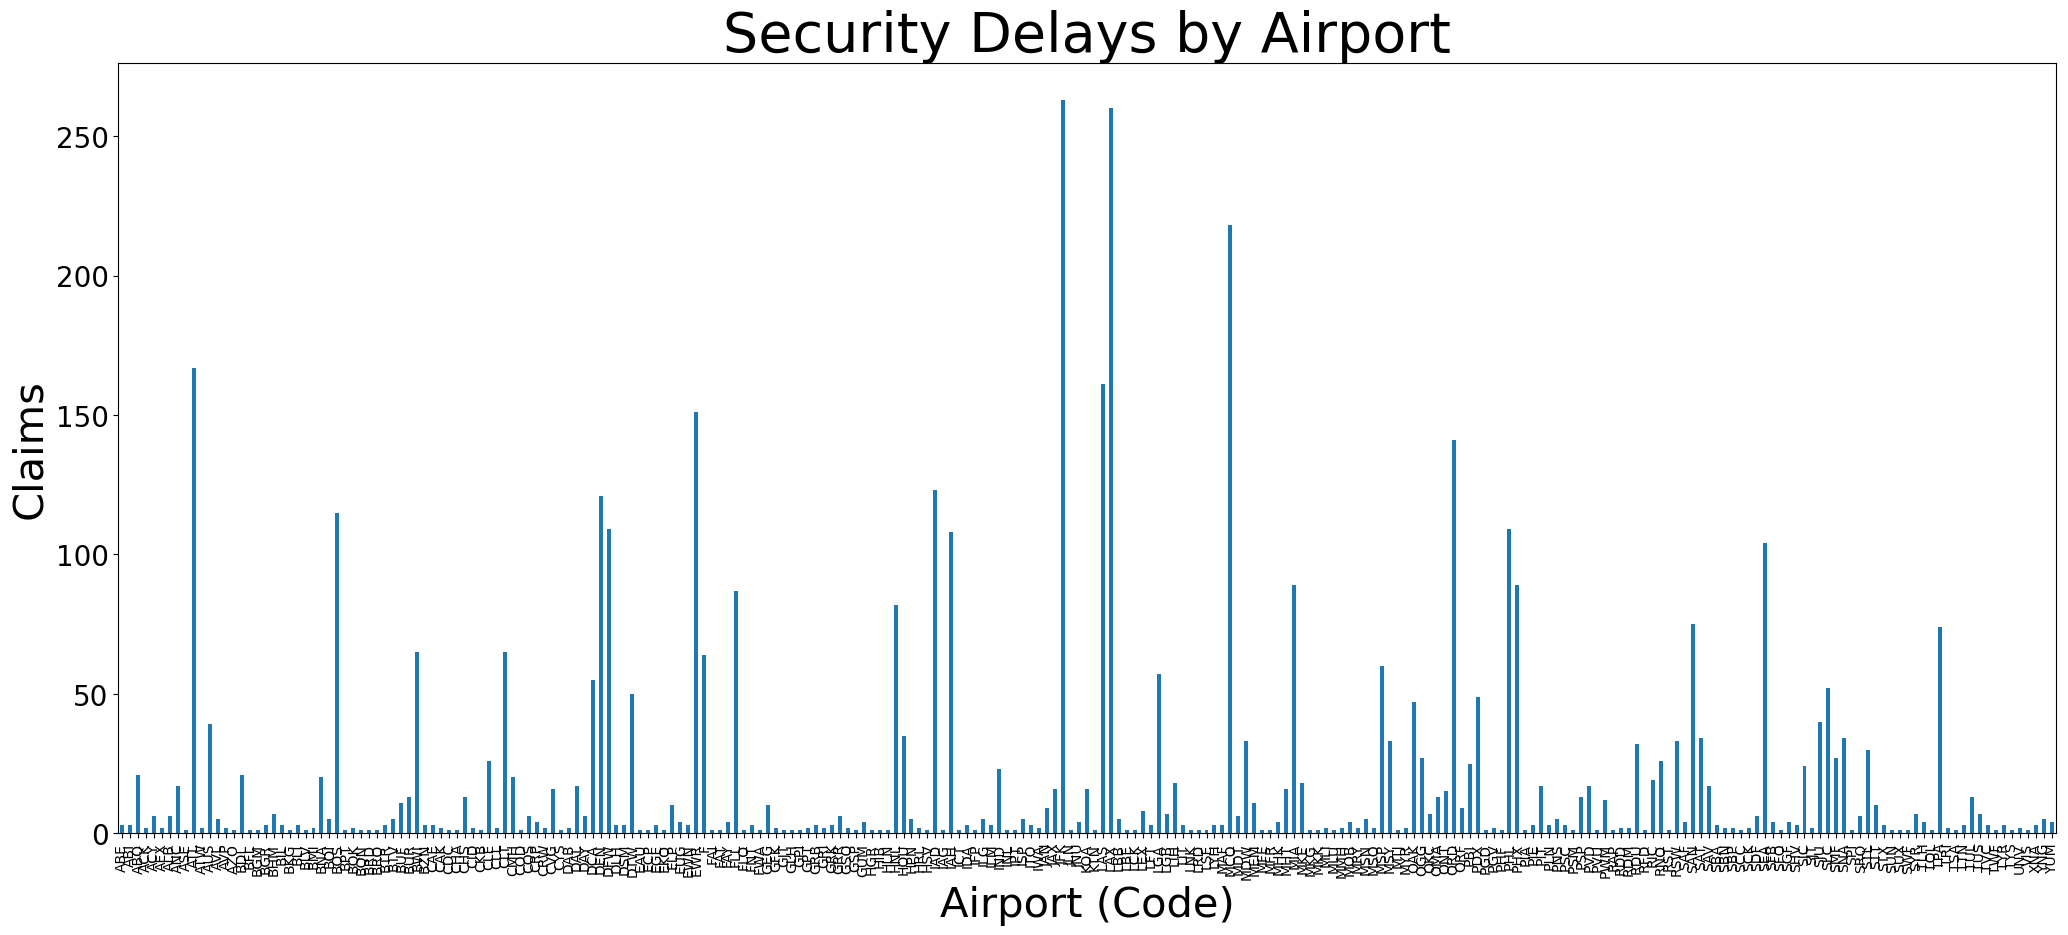

In [98]:
airport_security_delay.plot(figsize=(25,10),kind="bar")
plt.ylabel('Claims', fontsize='30')
plt.xlabel('Airport (Code)', fontsize='30')
plt.yticks(fontsize='20')
plt.xticks(fontsize='10')
plt.title('Security Delays by Airport', fontsize='40')

In [99]:
# Find how many claims associated with each airline:

airline_security_delay = security_df.groupby(["Airline Name"]).count()["Claim Number"]
airline_security_delay

Airline Name
Aer Lingus                                 3
Aero Flot                                  5
Aero Mexico                                4
Aeroflot Russian International             4
Aerolineas Argentinas                      1
                                          ..
Virgin America                            41
Virgin Atlantic                           18
Volaris Airlines                           4
Western Pacific Airlines Inc Westpac       1
Westjet Airlines Ltd                      23
Name: Claim Number, Length: 96, dtype: int64

Text(0.5, 1.0, 'Security Delays by Airline')

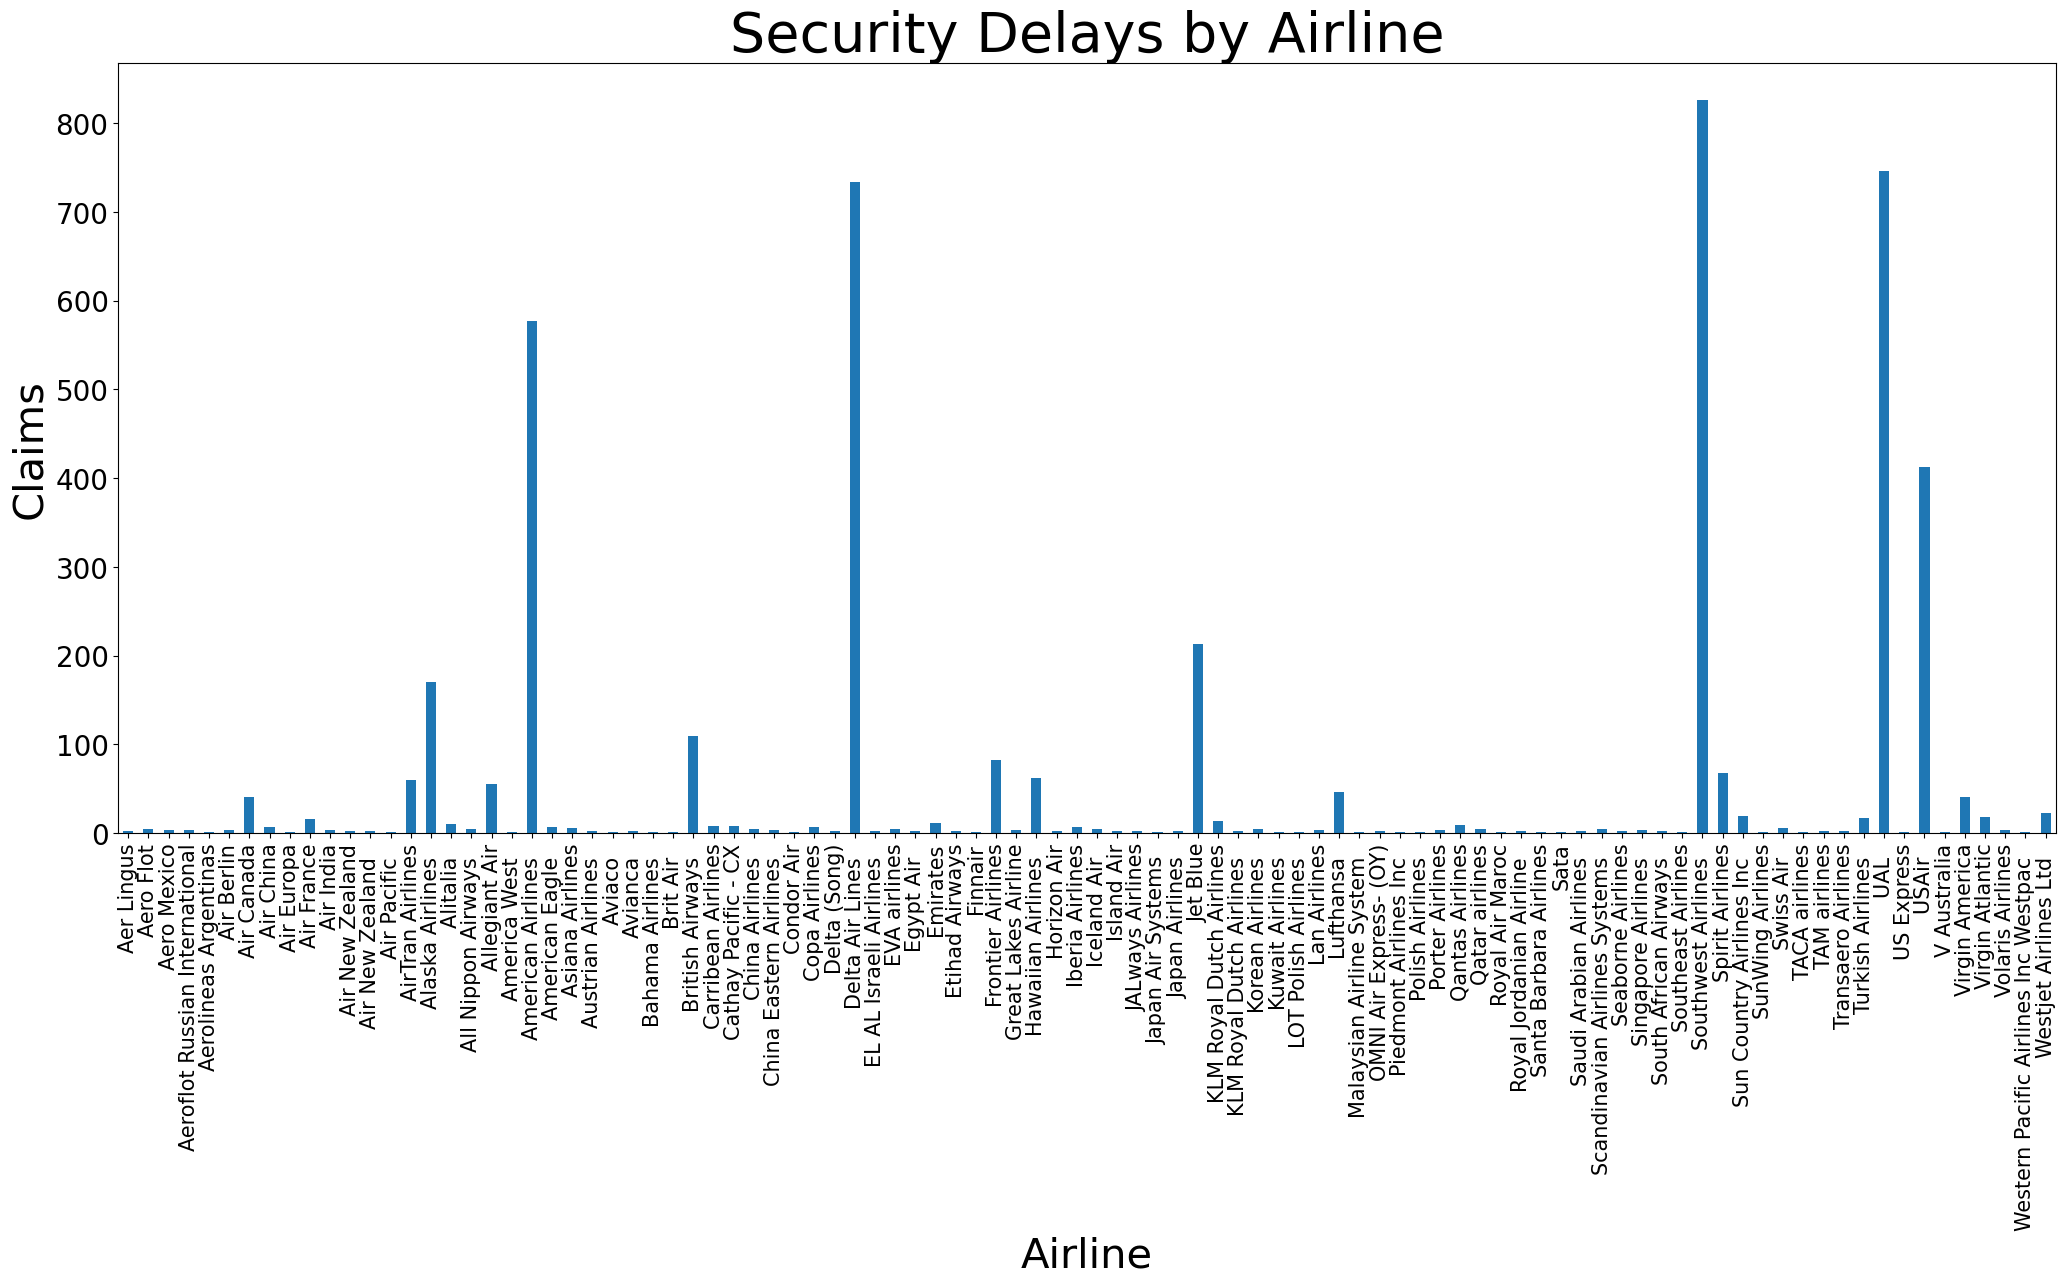

In [100]:
airline_security_delay.plot(figsize=(25,10),kind="bar")
plt.ylabel('Claims', fontsize='30')
plt.xlabel('Airline', fontsize='30')
plt.yticks(fontsize='20')
plt.xticks(fontsize='15')
plt.title('Security Delays by Airline', fontsize='40')

In [101]:
# Find number of claims for each claim type:

security_claim_types = security_df.groupby(["Claim Type"]).count()["Claim Number"]
security_claim_types

Claim Type
Complaint                     3
Passenger Property Loss    2566
Personal Injury              15
Property Damage            2009
Name: Claim Number, dtype: int64

Text(0.5, 1.0, 'Claim types at TSA')

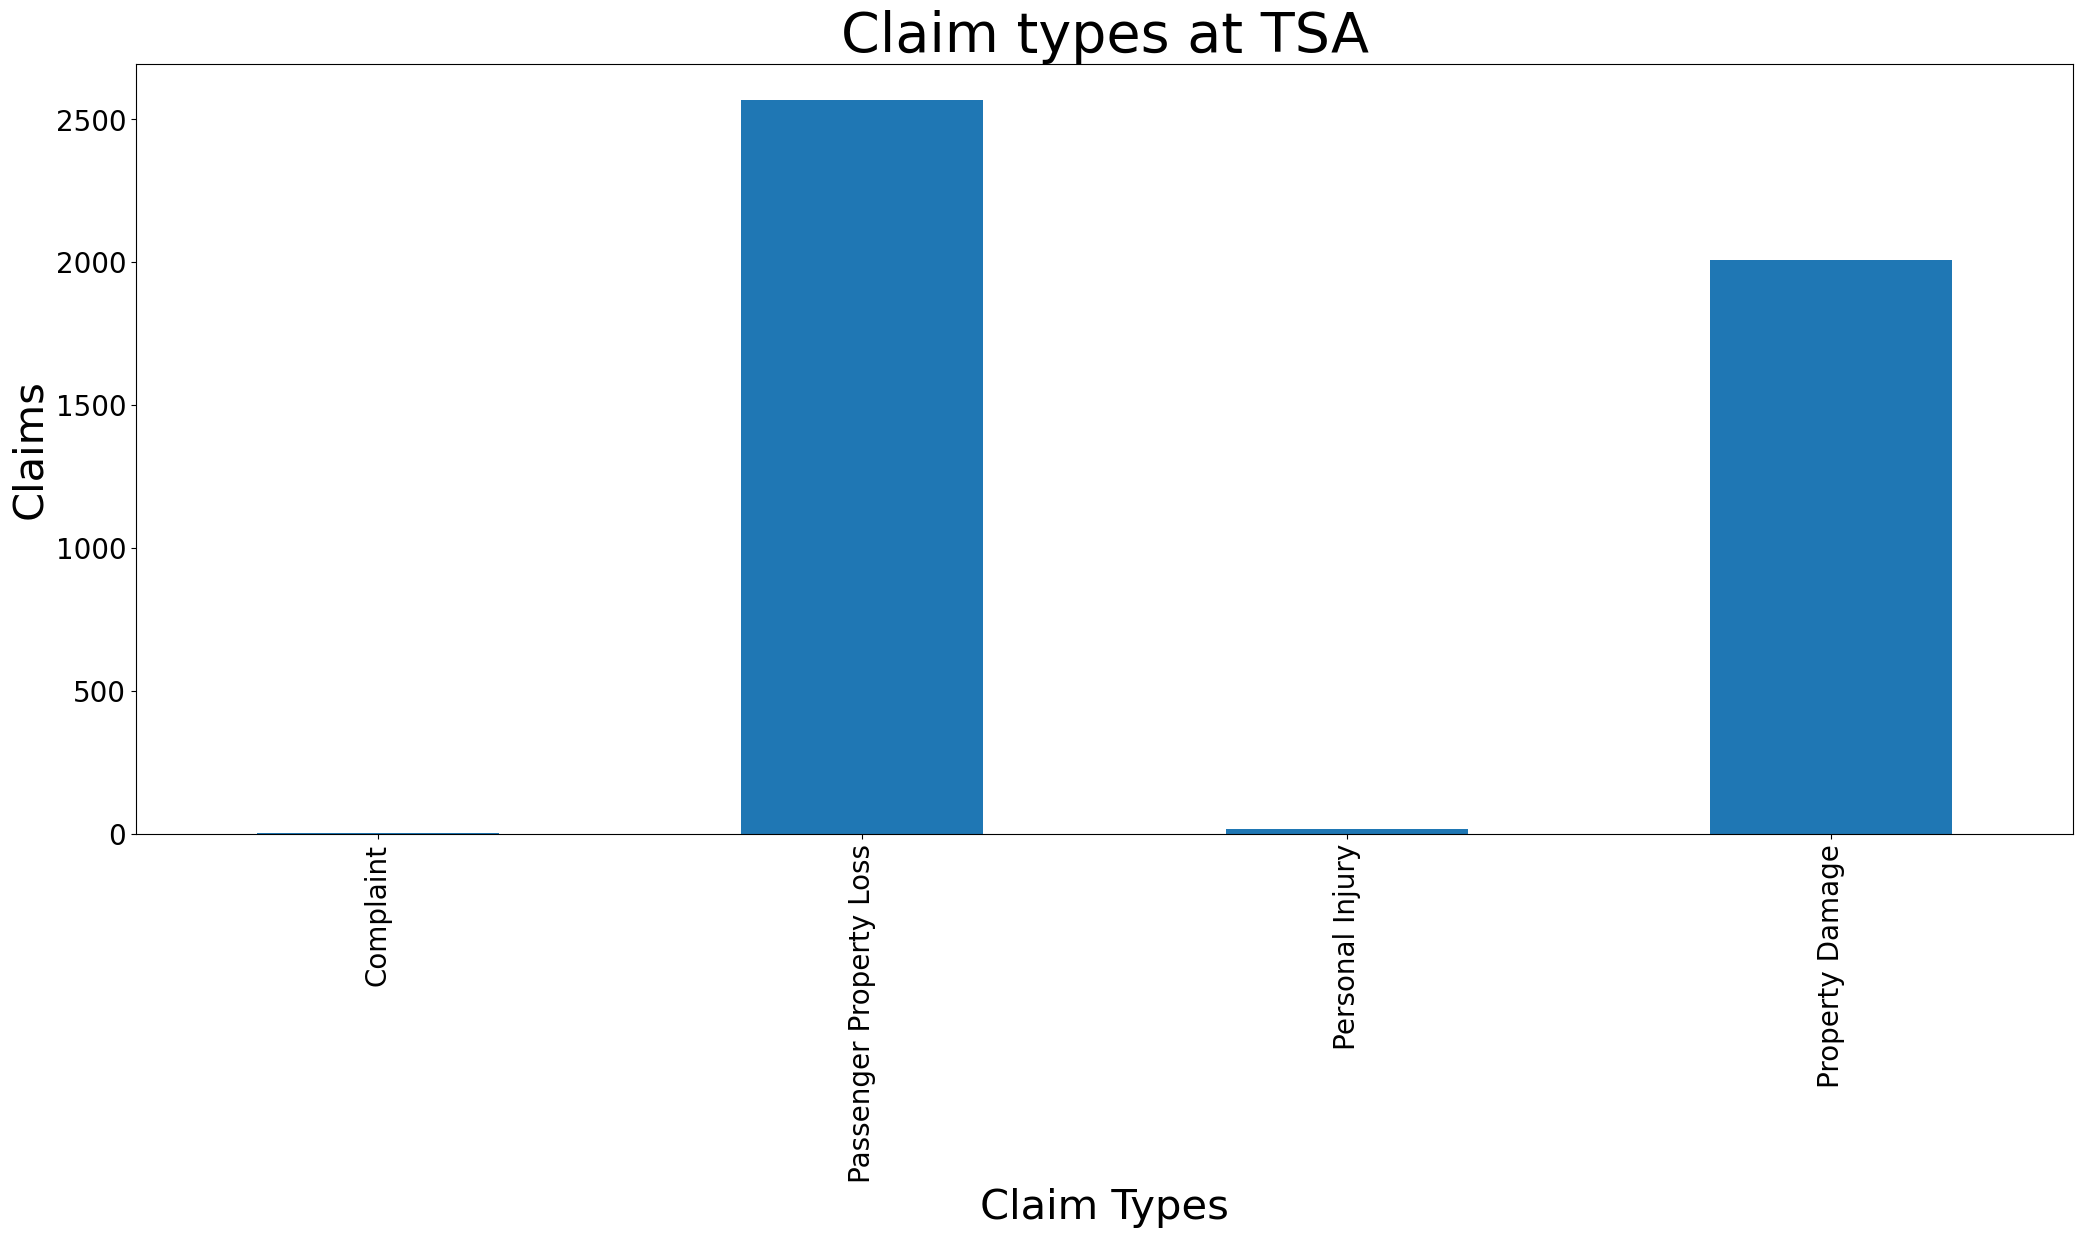

In [102]:
security_claim_types.plot(figsize=(25,10),kind="bar")
plt.ylabel('Claims', fontsize='30')
plt.xlabel('Claim Types', fontsize='30')
plt.yticks(fontsize='20')
plt.xticks(fontsize='20')
plt.title('Claim types at TSA', fontsize='40')

In [103]:
# Find how many claims for each type of item:

security_item_types = security_df.groupby(["Item Category"]).count()["Claim Number"]
security_item_types

Item Category
Audio/Video                                           29
Audio/Video; Clothing; Other                           1
Audio/Video; Currency                                  1
Audio/Video; Jewelry & Watches                         1
Audio/Video; Travel Accessories                        1
                                                    ... 
Sporting Equipment & Supplies; Travel Accessories      1
Tools & Home Improvement Supplies                     31
Toys & Games                                          24
Travel Accessories                                   355
Travel Accessories; Travel Accessories                 1
Name: Claim Number, Length: 194, dtype: int64

Text(0.5, 1.0, 'Item types at TSA')

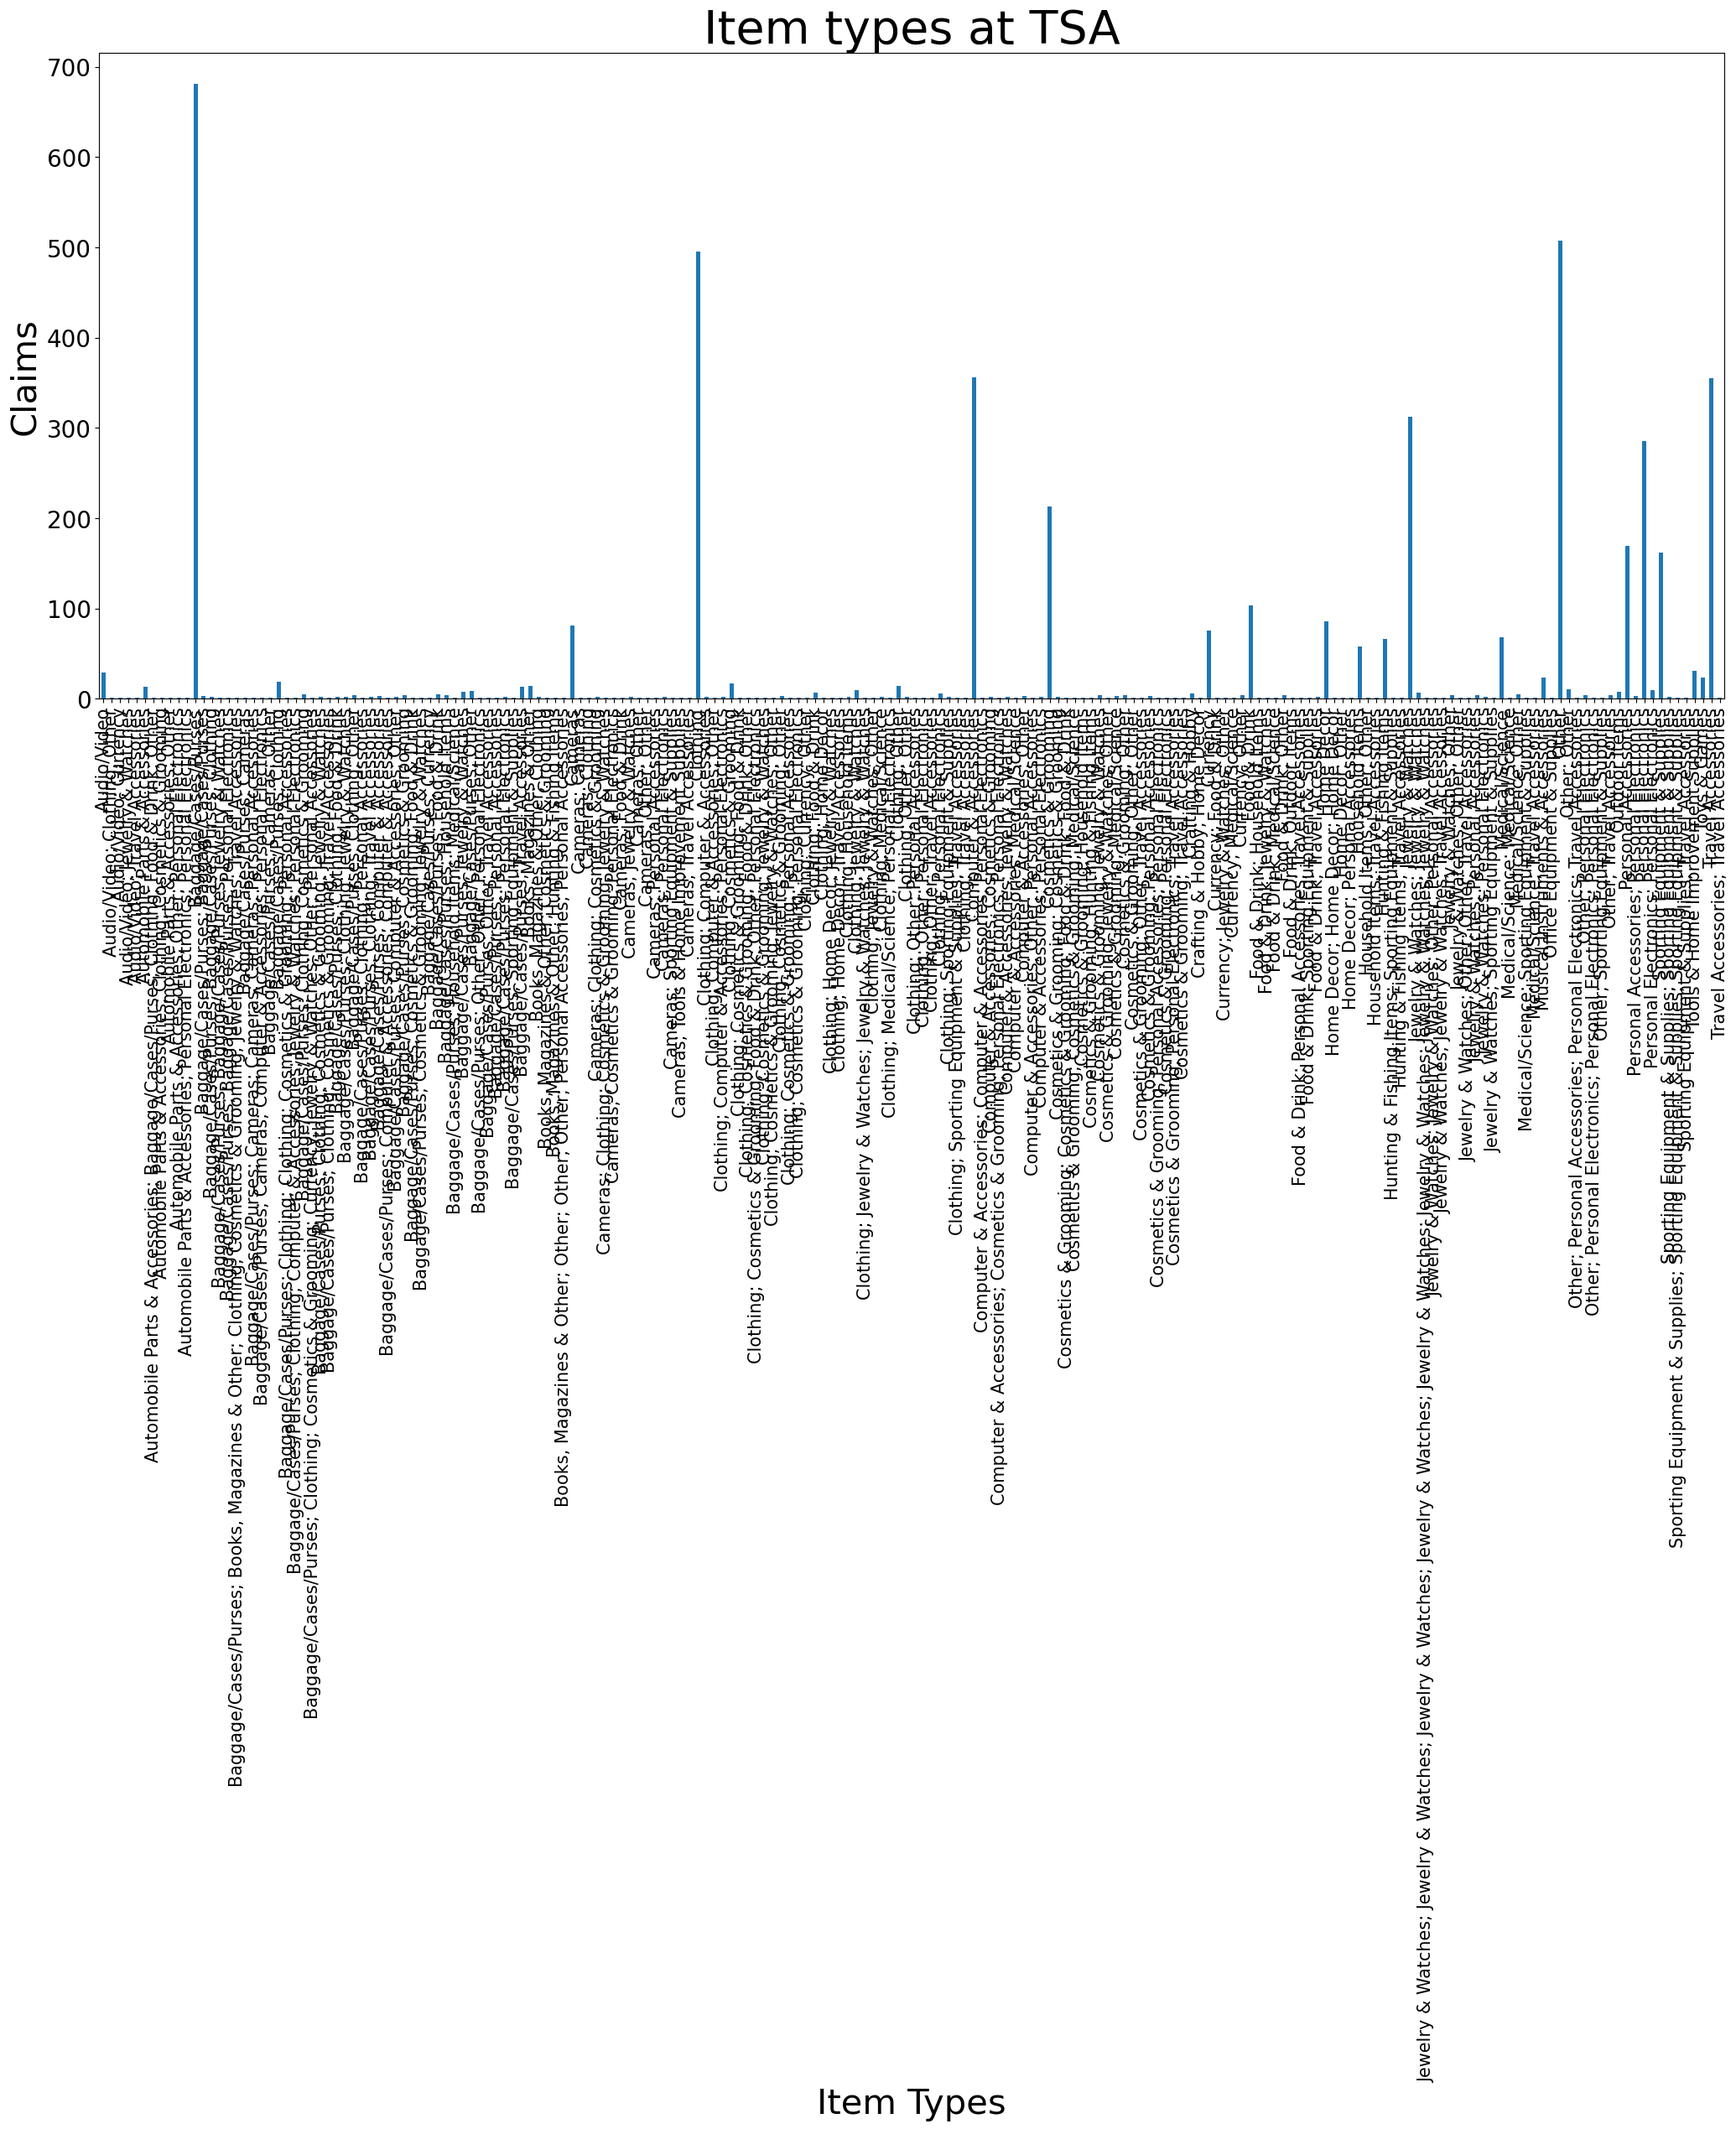

In [104]:
security_item_types.plot(figsize=(25,10),kind="bar")
plt.ylabel('Claims', fontsize='30')
plt.xlabel('Item Types', fontsize='30')
plt.yticks(fontsize='20')
plt.xticks(fontsize='15')
plt.title('Item types at TSA', fontsize='40')

In [105]:
# Find highest payout for each claim type:

#security_payouts = security_df.groupby(["Claim Type"]).count()["Close Amount"]
#security_payouts

In [106]:
# Find percent of claims approved, settled, and denied:

claim_results = security_df.groupby(["Disposition"]).count()["Claim Number"]
claim_results

Disposition
Approve in Full    1473
Deny               2497
Settle              623
Name: Claim Number, dtype: int64

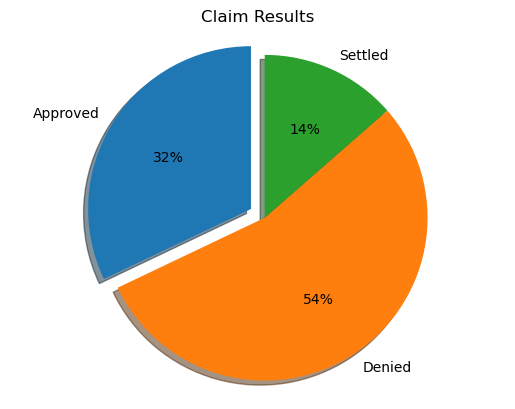

In [107]:
labels = 'Approved', 'Denied', 'Settled'
sizes = [1473, 2497, 623]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Approved')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Ensures that pie is drawn as a circle.
ax1.set_title('Claim Results')
plt.show()

In [108]:
# To summarize:

for col in security_df.columns:
    print(security_df[col].value_counts().nlargest(3))
    print('--------------------------\n')

2.014010e+12    629
2.014040e+12    582
2.014020e+12    564
Name: Claim Number, dtype: int64
--------------------------

6-Jan-14     56
10-Mar-14    56
8-Jan-14     52
Name: Date Received, dtype: int64
--------------------------

8-Jan-14     34
29-Dec-13    32
30-Dec-13    30
Name: Incident Date, dtype: int64
--------------------------

JFK    263
LAX    260
MCO    218
Name: Airport Code, dtype: int64
--------------------------

John F. Kennedy International         263
Los Angeles International Airport     260
Orlando International Airport         218
Name: Airport Name, dtype: int64
--------------------------

Southwest Airlines      826
UAL                     746
Delta Air Lines         733
Name: Airline Name, dtype: int64
--------------------------

Passenger Property Loss    2566
Property Damage            2009
Personal Injury              15
Name: Claim Type, dtype: int64
--------------------------

Checked Baggage    3616
Checkpoint          968
Other                 9
Name: 